In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from pprint import pprint
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import r2_score
sns.set_style(style = 'whitegrid')
sns.set_theme('paper')
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# Setting up Data Frames
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target
# Making a separate Data Frame with Pricr included
df = features.copy()
df['Price'] = targets

In [3]:
# Printing Feature Description for reference
print(boston.DESCR[260:1200]) 

 :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner


In [4]:
# Peeking into dataset
display(features.head())
display(df.tail())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Basic check on data quality

In [5]:
# Checking for null values
print(df.isnull().sum()) # None Found
print("============================================")
#
display(df.info())
print("============================================")
# Checking type of variables
display(df.describe())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Some basic EDA to start with

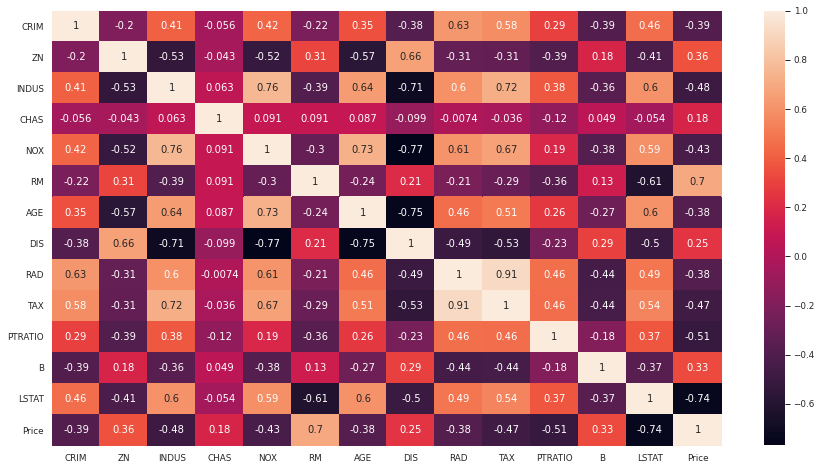

In [6]:
# Plotting correlation
# Will help in interpreting the results
# By removing colinear features IF REQUIRED

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True)
plt.show()

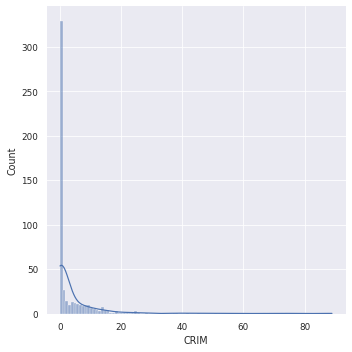

In [7]:
# Checking distribution of Crime rate

sns.displot(x = df['CRIM'], kde = True)
plt.show()

# Observation: A classic example of Long Tailed Distribution as majority of the population is 
# from a non criminal background

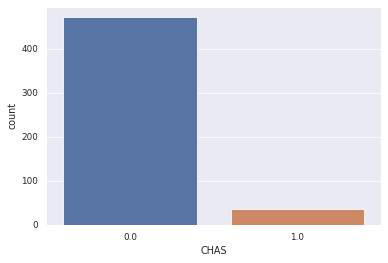

In [8]:
# Checking Count of this categorical variable
sns.countplot(x=df['CHAS'])
plt.show()
# Observation : Lesser number of houses are there with a tract bound river (I've no idea what that means!)

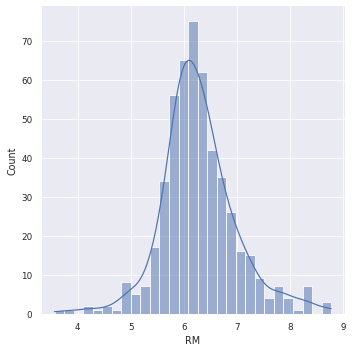

In [9]:
# Plotting number of rooms count
sns.displot(df['RM'],kde=True)
plt.show()

# Observation: It represents a near perfect normal distribution
# indicating that frequency of occurence of values near mean is higher

### Feature Selection

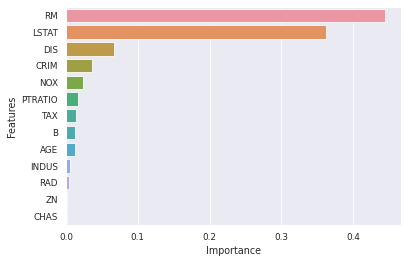

In [10]:
# I'll be using Feature Importances from Random Forest Regressor 
# to eliminate a few features if possible

rf_feature = RandomForestRegressor()
rf_feature.fit(features,targets)
feature_df = pd.DataFrame({'Importance':rf_feature.feature_importances_,'Features':features.columns})
feature_df.sort_values(by='Importance',ascending=False,inplace=True)
sns.barplot(x=feature_df['Importance'],y=feature_df['Features'])
plt.show()

# Based on graph below I'll be taking top 5 features from here
# Namely, RM, LSTAT, DIS, CRIM, NOX

train_cols = ['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX']

In [12]:
# Not going to use scaled features so commenting it out
# as it is a simple data set so I'll avoid all inverse transform hassle here

#scaler = StandardScaler()
# df_scaled = df.copy()
# df_scaled[train_cols] = scaler.fit_transform(df_scaled[train_cols])
# display(df_scaled[train_cols].head())

,RM,LSTAT,DIS,CRIM,NOX
0,0.413672,-1.075562,0.140214,-0.419782,-0.144217
1,0.194274,-0.492439,0.557160,-0.417339,-0.740262
2,1.282714,-1.208727,0.557160,-0.417342,-0.740262
3,1.016303,-1.361517,1.077737,-0.416750,-0.835284
4,1.228577,-1.026501,1.077737,-0.412482,-0.835284


### Model Selection

Model  Mean R2              Std of R2
LR--> -0.10654949985385576, 1.0679838597910158
SVR--> 0.22455167151373887, 0.26654273154629765
RFR--> 0.44453079444984367, 0.3612473849383555
GBR--> 0.5071837785032386, 0.32247409848516473


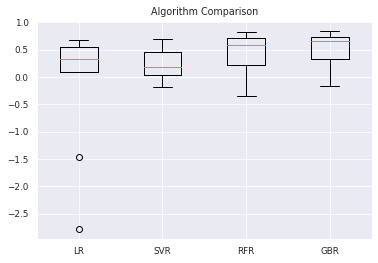

In [23]:
# Will be using k fold to select amongst LR, SVR, GBR and RFR

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
print('Model',' Mean R2', '             Std of R2')
for name, model in models:
    cv_results = cross_val_score(model, df[train_cols], targets, cv=10, 
                                 scoring = 'r2')
    results.append(cv_results)
    names.append(name)
    print('{}--> {}, {}'.format(name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Observation: Here GBR seems to have the best mean R2 score with least std
# Will be predicting using it

In [14]:
# Random sampling
X_train,X_test,y_train,y_test = train_test_split(df[train_cols],targets,test_size=0.30,random_state=0)

In [15]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("R2 Score:",r2_score(y_test,y_pred))

R2 Score: 0.8391780898346026


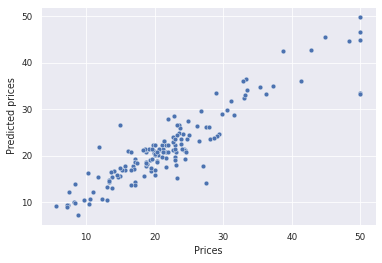

In [16]:
# A visual inspection of results via simple scatter plot
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()

#### Observation: From the above analysis we do not see a great performance from such SOTA algorithms. So as an experimentation I'll be running the above tests again taking into account all the features as is.

Model  Mean R2              Std of R2
LR--> 1.0, 0.0
SVR--> -0.3717593887733242, 0.3780141235582324
RFR--> 0.9991755962298393, 0.0006767862608415351
GBR--> 0.9993317333528623, 0.0003830592704564915


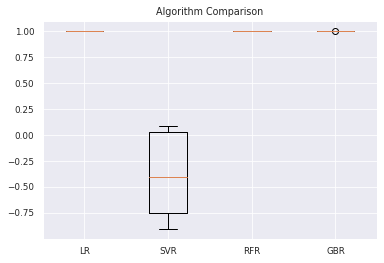

In [17]:
# Will be using k fold to select amongst LR, SVR, GBR and RFR

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
print('Model',' Mean R2', '             Std of R2')
for name, model in models:
    cv_results = cross_val_score(model, df, targets, cv=10, 
                                 scoring = 'r2') # Will take whole df in this one
    results.append(cv_results)
    names.append(name)
    print('{}--> {}, {}'.format(name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Observation: Here in this approach we can see a completely different picture

In [18]:
# Random sampling
X_train,X_test,y_train,y_test = train_test_split(df,targets,test_size=0.30,random_state=0) 
# Full df here as well

In [19]:
model_full = GradientBoostingRegressor()
model_full.fit(X_train,y_train)
y_pred_full = model_full.predict(X_test)
print("R2 Score:",r2_score(y_test,y_pred_full))

R2 Score: 0.999775749333463


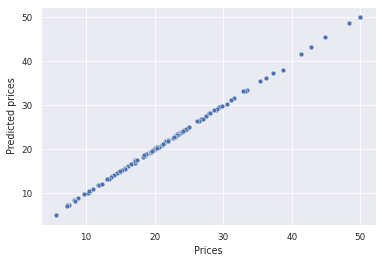

In [20]:
# A visual inspection of results via simple scatter plot
sns.scatterplot(x=y_test, y=y_pred_full)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.show()